In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
cern_df = pd.read_csv("/content/dielectron.csv")

cern_df.drop_duplicates(inplace=True)
cern_df.drop(columns=["Event", "Run"], inplace=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

nan_index = cern_df[cern_df['M'].isnull()].index
all_columns = cern_df.columns
imp_mean = IterativeImputer(random_state=0)
cern_df = pd.DataFrame(imp_mean.fit_transform(cern_df), columns=all_columns)
cern_df.loc[nan_index, 'M']

# StandardScaler for normalization
scaler = StandardScaler()
cern_df = pd.DataFrame(scaler.fit_transform(cern_df), columns=all_columns)

# Convert the DataFrame to a NumPy array
data = cern_df.values

In [ ]:
# pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.5 MB/s eta 0:00:00


Implementation 2:

The train method uses the contrastive divergence algorithm with a mini-batch training approach. It shuffles the data and iterates through mini-batches for each epoch. It also samples binary states for the hidden units based on the probabilities obtained from the sigmoid activation function, just like in the first implementation.
The transform method is added to transform the visible data into hidden representations. It is used to obtain hidden probabilities, which could be used for tasks like feature learning or unsupervised feature extraction.

In [ ]:
## Implementation of RBM from Scratch and also clustering

import numpy as np
from sklearn_extra.cluster import KMedoids
class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = np.random.randn(num_visible, num_hidden)
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def _sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def train(self, data, learning_rate=0.1, num_epochs=100):
        num_examples = data.shape[0]

        for epoch in range(num_epochs):
            # Positive phase
            positive_hidden_activations = np.dot(data, self.weights) + self.hidden_bias
            positive_hidden_probs = self._sigmoid(positive_hidden_activations)
            positive_hidden_states = np.random.binomial(1, positive_hidden_probs)

            positive_associations = np.dot(data.T, positive_hidden_probs)

            # Negative phase
            negative_visible_activations = np.dot(positive_hidden_states, self.weights.T) + self.visible_bias
            negative_visible_probs = self._sigmoid(negative_visible_activations)
            negative_visible_states = np.random.binomial(1, negative_visible_probs)
            negative_hidden_activations = np.dot(negative_visible_states, self.weights) + self.hidden_bias
            negative_hidden_probs = self._sigmoid(negative_hidden_activations)

            negative_associations = np.dot(negative_visible_states.T, negative_hidden_probs)

            # Update parameters
            self.weights += learning_rate * (positive_associations - negative_associations) / num_examples
            self.visible_bias += learning_rate * np.mean(data - negative_visible_probs, axis=0)
            self.hidden_bias += learning_rate * np.mean(positive_hidden_probs - negative_hidden_probs, axis=0)

    def sample(self, num_samples):
        hidden_states = np.random.rand(num_samples, self.num_hidden)
        visible_activations = np.dot(hidden_states, self.weights.T) + self.visible_bias
        visible_probs = self._sigmoid(visible_activations)
        visible_states = np.random.binomial(1, visible_probs)
        return visible_states



d# Initialize the RBM model
num_visible = data.shape[1]
num_hidden = 10  # Adjust the number of hidden units as needed
rbm = RBM(num_visible, num_hidden)

# Train the RBM using the CERN di-electron collision data
rbm.train(data, learning_rate=0.1, num_epochs=100)

# Generate samples from the trained RBM
num_samples = 10
generated_samples = rbm.sample(num_samples)
print("Generated samples:")
print(generated_samples)

# Apply K-Medoids clustering to the hidden representations
kmedoids = KMedoids(n_clusters=num_hidden, random_state=42, metric='euclidean')
kmedoids.fit(rbm.weights.T)  # Use transposed weights as data for clustering

# Get cluster labels
cluster_labels = kmedoids.labels_

# Print cluster labels for each data point
for i in range(num_samples):
    print(f"Generated sample {i}: Cluster {cluster_labels[i]}")

AttributeError: ignored

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn_extra.cluster import KMedoids

# Sample binary data (replace this with your own data)
data = np.random.randint(0, 2, size=(100, 20))  # 100 samples, 20 features (binary data)

# RBM implementation and training
num_visible = data.shape[1]
num_hidden = 10  # Adjust the number of hidden units as needed
rbm = BernoulliRBM(n_components=num_hidden)
rbm.fit(data)

# Extract hidden representations
hidden_representation = rbm.transform(data)

# Apply clustering algorithm (K-Medoids)
num_clusters = 92  # Adjust the number of clusters as needed
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42, metric='euclidean')
kmedoids.fit(hidden_representation)

# Get cluster labels
cluster_labels = kmedoids.labels_

# Print cluster labels for each data point
for i in range(len(data)):
    print(f"Data point {i}: Cluster {cluster_labels[i]}")


Data point 0: Cluster 25
Data point 1: Cluster 49
Data point 2: Cluster 29
Data point 3: Cluster 72
Data point 4: Cluster 34
Data point 5: Cluster 82
Data point 6: Cluster 6
Data point 7: Cluster 91
Data point 8: Cluster 8
Data point 9: Cluster 41
Data point 10: Cluster 86
Data point 11: Cluster 57
Data point 12: Cluster 53
Data point 13: Cluster 52
Data point 14: Cluster 14
Data point 15: Cluster 51
Data point 16: Cluster 88
Data point 17: Cluster 39
Data point 18: Cluster 85
Data point 19: Cluster 19
Data point 20: Cluster 91
Data point 21: Cluster 83
Data point 22: Cluster 22
Data point 23: Cluster 28
Data point 24: Cluster 66
Data point 25: Cluster 61
Data point 26: Cluster 79
Data point 27: Cluster 27
Data point 28: Cluster 0
Data point 29: Cluster 84
Data point 30: Cluster 69
Data point 31: Cluster 31
Data point 32: Cluster 21
Data point 33: Cluster 20
Data point 34: Cluster 73
Data point 35: Cluster 18
Data point 36: Cluster 84
Data point 37: Cluster 37
Data point 38: Cluster 38

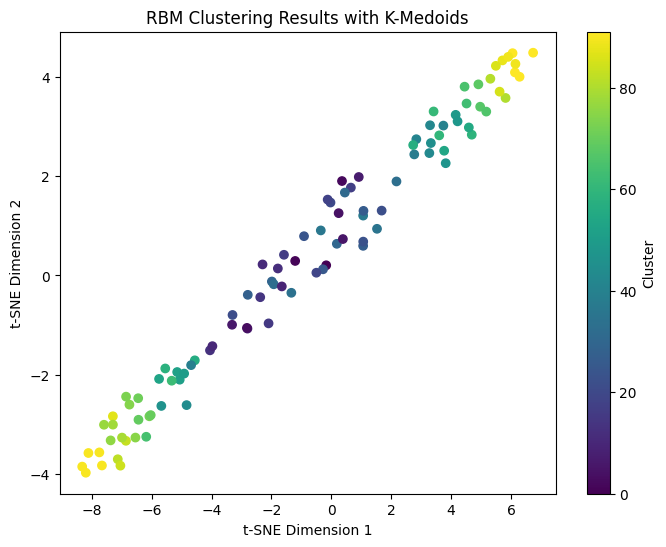

t-SNE Dimension 1:
[ 2.7706172   5.8192716   3.273917   -4.8332033   6.739256    5.6201353
 -3.3145108   0.91701144  6.1326103   4.1534724  -6.1813407  -2.2968495
 -5.062777   -4.0518265  -2.3735225  -8.112501   -6.076402    0.6528522
  5.71508     4.516282   -0.02739164 -3.299516   -7.660608    4.9709616
 -0.9112186   6.287851    3.4160712   1.0629478  -2.7898571  -1.9856395
  4.6906934  -5.546196    3.769372    2.1757948  -1.3352404   1.5261304
  3.82054    -7.5918465   4.59308     3.742522   -0.17043427  2.8387675
  4.911633   -6.8589787   1.0635257   3.3247967   6.1491446  -0.3513005
 -7.131529   -1.2070205  -7.2952623  -7.293835   -5.147687   -5.7526326
 -1.9224436  -7.74674    -4.558872    5.175219    0.4517092   0.1841973
  3.6043758   1.0741841   5.3120418  -0.2770626  -4.682795   -5.3304377
  2.734039    1.0659302   1.6810491  -0.4992509  -0.12170683  5.496117
 -1.5813712  -2.0952222  -1.7855628  -3.9714863   6.0534215  -4.915029
 -6.742406   -8.198817   -1.6530248   4.450814 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
from sklearn.neural_network import BernoulliRBM

# Sample binary data (replace this with your own data)
data = np.random.randint(0, 2, size=(100, 20))  # 100 samples, 20 features (binary data)

# RBM implementation and training
num_visible = data.shape[1]
num_hidden = 10  # Adjust the number of hidden units as needed
rbm = BernoulliRBM(n_components=num_hidden)
rbm.fit(data)

# Extract hidden representations
hidden_representation = rbm.transform(data)

# Apply dimensionality reduction (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
hidden_tsne = tsne.fit_transform(hidden_representation)

# Apply clustering algorithm (K-Medoids)
num_clusters = 92  # Adjust the number of clusters as needed
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42, metric='euclidean')
kmedoids.fit(hidden_representation)

# Get cluster labels
cluster_labels = kmedoids.labels_

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(hidden_tsne[:, 0], hidden_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title("RBM Clustering Results with K-Medoids")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(scatter, label="Cluster")
plt.show()
# Print the expressions of t-SNE Dimension 1 and t-SNE Dimension 2
print("t-SNE Dimension 1:")
print(hidden_tsne[:, 0])

print("\nt-SNE Dimension 2:")
print(hidden_tsne[:, 1])

# Print the learned RBM weights and biases
print("\nRBM Weights:")
print(rbm.components_)

print("\nRBM Visible Biases:")
print(rbm.intercept_visible_)

print("\nRBM Hidden Biases:")
print(rbm.intercept_hidden_)

In [ ]:
import plotly.graph_objects as go
cluster_labels = kmedoids.labels_

# Create a DataFrame with hidden t-SNE coordinates and cluster labels
df = pd.DataFrame({'x': hidden_tsne[:, 0], 'y': hidden_tsne[:, 1], 'cluster': cluster_labels})

# Plot the results using Plotly
fig = go.Figure()

for cluster in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data['x'],
        y=cluster_data['y'],
        mode='markers',
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title="RBM Clustering Results with K-Medoids",
    xaxis=dict(title="t-SNE Dimension 1"),
    yaxis=dict(title="t-SNE Dimension 2"),
    showlegend=True
)

fig.show()

In [ ]:

# Plot the results using Plotly in 3D with cluster information as the third dimension
fig = go.Figure(data=[go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['cluster'],
    mode='markers',
    marker=dict(size=5, color=df['cluster'], colorscale='Viridis', opacity=0.8),
)])

fig.update_layout(
    title="RBM Clustering Results in 3D",
    scene=dict(
        xaxis=dict(title="t-SNE Dimension 1"),
        yaxis=dict(title="t-SNE Dimension 2"),
        zaxis=dict(title="Cluster"),
    ),
)

fig.show()

In [ ]:
# Get cluster labels
cluster_labels = kmedoids.labels_
cluster_centers = kmedoids.cluster_centers_  # Cluster centers

wcss = 0  # Within-cluster sum of squares
avg_cluster_distance = 0  # Average distance between data points within the same cluster

for i in range(num_clusters):
    cluster_points = hidden_representation[cluster_labels == i]
    cluster_center = cluster_centers[i]

    # Calculate within-cluster sum of squares (WCSS)
    wcss += np.sum((cluster_points - cluster_center) ** 2)

    # Calculate average distance between data points within the same cluster
    avg_cluster_distance += np.mean(np.linalg.norm(cluster_points - cluster_center, axis=1))

wcss /= num_clusters
avg_cluster_distance /= num_clusters

print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Average Distance within Clusters:", avg_cluster_distance)

Within-Cluster Sum of Squares (WCSS): 8.117874286664574e-05
Average Distance within Clusters: 0.0005692395268321996


In [ ]:
import plotly.express as px
# Count the number of data points in each cluster
cluster_counts = np.bincount(cluster_labels)

# Create a DataFrame with cluster labels and sizes
df_cluster_sizes = pd.DataFrame({'Cluster': range(num_clusters), 'Size': cluster_counts})

# Plot the cluster size distribution
fig = px.bar(df_cluster_sizes, x='Cluster', y='Size', title='Cluster Size Distribution')
fig.update_layout(xaxis_title='Cluster', yaxis_title='Cluster Size')

# Add labels and markers to the bars
fig.update_traces(text=df_cluster_sizes['Size'], textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

In [ ]:
# Apply clustering algorithm (K-Medoids)
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42, metric='euclidean')
kmedoids.fit(hidden_representation)

# Get cluster labels and medoids
cluster_labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_
# Plot the results using Plotly
fig = go.Figure()

# Scatter plot of data points
fig.add_trace(go.Scatter(
    x=df['x'],
    y=df['y'],
    mode='markers',
    marker=dict(size=5, opacity=0.8, color=cluster_labels, colorscale='Viridis'),
    name='Data Points'
))

# Scatter plot of cluster medoids
for cluster in range(num_clusters):
    fig.add_trace(go.Scatter(
        x=[medoids[cluster, 0]],
        y=[medoids[cluster, 1]],
        mode='markers',
        marker=dict(size=8, opacity=1, color='red'),
        name=f'Cluster {cluster + 1} Medoid'
    ))

fig.update_layout(
    title="RBM Clustering Results with Cluster Medoids",
    xaxis=dict(title="t-SNE Dimension 1"),
    yaxis=dict(title="t-SNE Dimension 2"),
    showlegend=True
)

fig.show()

In [ ]:
# Get cluster labels
cluster_labels = kmedoids.labels_

# Get cluster centroids
cluster_centroids = hidden_representation[kmedoids.medoid_indices_]

# Plot the results using Plotly in 3D with cluster information as the third dimension
fig = go.Figure()

# Scatter plot of data points with cluster labels as the third axis
fig.add_trace(go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['cluster'],
    mode='markers',
    marker=dict(size=5, color=df['cluster'], colorscale='Viridis', opacity=0.8),
    name='Data Points'
))

# Scatter plot for each cluster centroid
for i in range(num_clusters):
    centroid = cluster_centroids[i]
    fig.add_trace(go.Scatter3d(
        x=[centroid[0]],
        y=[centroid[1]],
        z=[i],
        mode='markers',
        marker=dict(size=8, color='red'),
        name=f'Cluster {i+1} Centroid'
    ))

fig.update_layout(
    title="RBM Clustering Results in 3D with K-Medoids",
    scene=dict(
        xaxis=dict(title="t-SNE Dimension 1"),
        yaxis=dict(title="t-SNE Dimension 2"),
        zaxis=dict(title="Cluster Label"),
    ),
)

fig.show()

In [ ]:
# Plot the results using Plotly in 3D with cluster centroids
fig = go.Figure()

# Scatter plot of data points
fig.add_trace(go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['cluster'],
    mode='markers',
    marker=dict(size=5, color=df['cluster'], colorscale='Viridis', opacity=0.8),
    name='Data Points'
))

# Scatter plot of cluster centroids
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_centroid = hidden_tsne[cluster_indices].mean(axis=0)
    fig.add_trace(go.Scatter3d(
        x=[cluster_centroid[0]],
        y=[cluster_centroid[1]],
        z=[cluster],
        mode='markers',
        marker=dict(size=8, opacity=1, color='red'),
        name=f'Cluster {cluster + 1} Centroid'
    ))

fig.update_layout(
    title="RBM Clustering Results with K-Medoids in 3D",
    scene=dict(
        xaxis=dict(title="t-SNE Dimension 1"),
        yaxis=dict(title="t-SNE Dimension 2"),
        zaxis=dict(title="Cluster"),
    ),
)

fig.show()